Dataset Source https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?datasetId=138&sortBy=voteCount

In [1]:
import pandas as pd
import numpy as np

C:\Users\mkmah\anaconda3\envs\en_2\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\mkmah\anaconda3\envs\en_2\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\mkmah\anaconda3\envs\en_2\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
movies = pd.read_csv("tmdb_5000_movies.csv")

In [3]:
credits = pd.read_csv("tmdb_5000_credits.csv")

In [4]:
movies.sample()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4157,2000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 9648, ...",NaN,309919,"[{""id"": 2801, ""name"": ""self-defense""}, {""id"": ...",en,The Curse of Downers Grove,The town of Downers Grove looks like your aver...,2.00163,"[{""name"": ""Myriad Pictures"", ""id"": 738}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-08-21,0,89.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,High school can be murder.,The Curse of Downers Grove,4.4,24


In [5]:
credits.sample()

,movie_id,title,cast,crew
3504,9282,11:14,"[{""cast_id"": 10, ""character"": ""Jack"", ""credit_...","[{""credit_id"": ""52fe44e1c3a36847f80af88d"", ""de..."


In [6]:
credits.columns = ["id","title","cast","crew"]

In [7]:
credits.sample()

,id,title,cast,crew
4436,2652,Hard Candy,"[{""cast_id"": 11, ""character"": ""Jeff Kohlver"", ...","[{""credit_id"": ""52fe4363c3a36847f8050789"", ""de..."


In [8]:
dataset = credits.merge(movies,on="id")

In [9]:
dataset.sample(2)

,id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
935,11451,Herbie Fully Loaded,"[{""cast_id"": 1, ""character"": ""Maggie Peyton"", ...","[{""credit_id"": ""59620742925141790403a4fe"", ""de...",50000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10751, ""...",NaN,"[{""id"": 830, ""name"": ""car race""}, {""id"": 6067,...",en,Herbie Fully Loaded,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-06-22,66002004,101.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Start your engines...,Herbie Fully Loaded,5.1,542
3537,4997,Wonderland,"[{""cast_id"": 1, ""character"": ""John Holmes"", ""c...","[{""credit_id"": ""52fe43edc3a36847f8078c8b"", ""de...",5000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",NaN,"[{""id"": 642, ""name"": ""robbery""}, {""id"": 2375, ...",en,Wonderland,...,"[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",2003-10-23,2466444,104.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Sex, drugs, murder. Welcome to L.A.",Wonderland,6.2,73


In [10]:
dataset.columns

Index(['id', 'title_x', 'cast', 'crew', 'budget', 'genres', 'homepage',
       'keywords', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title_y', 'vote_average', 'vote_count'],
      dtype='object')

In [12]:
from ast import literal_eval

In [13]:
features =['cast', 'crew', 'genres','keywords', 'production_companies', 'production_countries', 'spoken_languages']

for feature in features:
    dataset[feature] = dataset[feature].apply(literal_eval)

In [14]:
type(dataset.loc[0,"cast"])

list

# Content Based Filtering¶

In [15]:
dataset.loc[0,"cast"]

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2},
 {'cast_id': 4,
  'character': 'Col. Quaritch',
  'credit_id': '52fe48009251416c750ac9cf',
  'gender': 2,
  'id': 32747,
  'name': 'Stephen Lang',
  'order': 3},
 {'cast_id': 5,
  'character': 'Trudy Chacon',
  'credit_id': '52fe48009251416c750ac9d3',
  'gender': 1,
  'id': 17647,
  'name': 'Michelle Rodriguez',
  'order': 4},
 {'cast_id': 8,
  'character': 'Selfridge',
  'credit_id': '52fe48009251416c750ac9e1',
  'gender': 2,
  'id': 1771,
  'name': 'Giovanni Ribisi',
  'order': 5},
 {'cast_id': 7,
  'c

In [16]:
def get_cast(row):
    lst = []
    if isinstance(row,list):
        for i in row:
            lst.append(i["character"])
    else :
        return []
    return lst

In [17]:
dataset["cast_character"]= dataset["cast"].apply(get_cast)

In [18]:
dataset["cast_character"].isnull().sum()

0

In [19]:
dataset["crew"][0]

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

In [20]:
def  get_director(row):
    if isinstance(row,list):
        for i in row:
            if i["job"]=="Director":
                return i["name"]
    else :
        return np.nan
           

In [21]:
dataset["director"]=dataset["crew"].apply(get_director)

In [22]:
dataset.director

0           James Cameron
1          Gore Verbinski
2              Sam Mendes
3       Christopher Nolan
4          Andrew Stanton
              ...        
4798     Robert Rodriguez
4799         Edward Burns
4800          Scott Smith
4801          Daniel Hsia
4802     Brian Herzlinger
Name: director, Length: 4803, dtype: object

In [23]:
def  get_director(row):
    if isinstance(row,list):
        for i in row:
            if i["job"]=="Writer":
                return i["name"]
        return "N/A"
    else :
        return np.nan
           
dataset["Writer"]=dataset["crew"].apply(get_director)

In [24]:
dataset["Writer"].value_counts()

N/A                     3252
Tyler Perry                6
M. Night Shyamalan         6
Luc Besson                 5
Mike Leigh                 5
                        ... 
Ruth Prawer Jhabvala       1
Stephan Elliott            1
Alain Resnais              1
Bo Zenga                   1
Daniel Hsia                1
Name: Writer, Length: 1308, dtype: int64

In [25]:
dataset = dataset.drop(["Writer"],axis=1)

In [26]:
dataset["genres"][2]

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 80, 'name': 'Crime'}]

In [27]:
def get_names(row):
    if isinstance(row,list):
        lst = [i["name"] for i in row]
        return lst
            

In [28]:
dataset["keywords"][0]

[{'id': 1463, 'name': 'culture clash'},
 {'id': 2964, 'name': 'future'},
 {'id': 3386, 'name': 'space war'},
 {'id': 3388, 'name': 'space colony'},
 {'id': 3679, 'name': 'society'},
 {'id': 3801, 'name': 'space travel'},
 {'id': 9685, 'name': 'futuristic'},
 {'id': 9840, 'name': 'romance'},
 {'id': 9882, 'name': 'space'},
 {'id': 9951, 'name': 'alien'},
 {'id': 10148, 'name': 'tribe'},
 {'id': 10158, 'name': 'alien planet'},
 {'id': 10987, 'name': 'cgi'},
 {'id': 11399, 'name': 'marine'},
 {'id': 13065, 'name': 'soldier'},
 {'id': 14643, 'name': 'battle'},
 {'id': 14720, 'name': 'love affair'},
 {'id': 165431, 'name': 'anti war'},
 {'id': 193554, 'name': 'power relations'},
 {'id': 206690, 'name': 'mind and soul'},
 {'id': 209714, 'name': '3d'}]

In [29]:
features =['cast', 'crew', 'genres','keywords', 'production_companies', 'production_countries', 'spoken_languages']
for feature in features:
    dataset[feature]=dataset[feature].apply(get_names)

In [30]:
dataset.sample()

,id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count,cast_character,director
1702,562,Die Hard,"[Bruce Willis, Alan Rickman, Alexander Godunov...","[John McTiernan, Joel Silver, Lawrence Gordon,...",28000000,"[Action, Thriller]",NaN,"[helicopter, journalist, based on novel, terro...",en,Die Hard,...,140767956,131.0,"[English, Deutsch, Italiano]",Released,40 Stories. Twelve Terrorists. One Cop.,Die Hard,7.5,3948,"[John McClane, Hans Gruber, Karl, Holly Genner...",John McTiernan


In [31]:
dataset.columns

Index(['id', 'title_x', 'cast', 'crew', 'budget', 'genres', 'homepage',
       'keywords', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title_y', 'vote_average', 'vote_count', 'cast_character',
       'director'],
      dtype='object')

In [31]:
# cast,crew,geners,keywords,original_language,tagline,director,overview,production_companies

In [32]:
dataset["overview"][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [33]:
def clean_data(row):
    if isinstance(row,list):
        return [ str.lower(i.replace(" ","")) for i in row]
    else :
        if isinstance(row,str):
            return (str.lower(row)).split()
        else :
            return []


In [34]:
dataset.sample()

,id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count,cast_character,director
1965,1788,Footloose,"[Kevin Bacon, John Lithgow, Dianne Wiest, Chri...","[Jane Feinberg, Mike Fenton, Marci Liroff, Ric...",8200000,"[Drama, Family, Music, Romance]",NaN,"[dancing, dancer, dance, music, dance teacher]",en,Footloose,...,80035402,107.0,[English],Released,NaN,Footloose,6.4,505,"[Ren McCormack, Reverend Shaw Moore, Vi Moore,...",Herbert Ross


In [35]:
features = ["cast","genres","keywords","original_language","tagline","director","overview","production_companies"]
for fe in features:
    dataset[fe]=dataset[fe].apply(clean_data)

In [36]:
features = ["cast","genres","keywords","original_language","tagline","director","overview","production_companies"]
for fe in features:
    print(dataset[fe][0])

['samworthington', 'zoesaldana', 'sigourneyweaver', 'stephenlang', 'michellerodriguez', 'giovanniribisi', 'joeldavidmoore', 'cchpounder', 'wesstudi', 'lazalonso', 'dileeprao', 'mattgerald', 'seananthonymoran', 'jasonwhyte', 'scottlawrence', 'kellykilgour', 'jamespatrickpitt', 'seanpatrickmurphy', 'peterdillon', 'kevindorman', 'kelsonhenderson', 'davidvanhorn', 'jacobtomuri', 'michaelblain-rozgay', 'joncurry', 'lukehawker', 'woodyschultz', 'petermensah', 'soniayee', 'jahnelcurfman', 'ilramchoi', 'kylawarren', 'lisaroumain', 'debrawilson', 'chrismala', 'taylorkibby', 'jodielandau', 'julielamm', 'cullenb.madden', 'josephbradymadden', 'frankietorres', 'austinwilson', 'sarawilson', 'tamicawashington-miller', 'lucybriant', 'nathanmeister', 'gerryblair', 'matthewchamberlain', 'paulyates', 'wraywilson', 'jamesgaylyn', 'melvinlenoclarkiii', 'carvonfutrell', 'brandonjelkes', 'micahmoch', 'hanniyahmuhammad', 'christophernolen', 'christaoliver', 'aprilmariethomas', 'bravitaa.threatt', 'colinbleasd

In [37]:
def create_soup(dataset):
    return " ".join(dataset["cast"])+" "+" ".join(dataset["genres"])+" "+" ".join(dataset["keywords"])+" "+" ".join(dataset["original_language"])+" "+" ".join(dataset["tagline"])+" "+" ".join(dataset["director"])+" "+" ".join(dataset["overview"])+" "+" ".join(dataset["production_companies"])

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
dataset["soup"] = dataset.apply(create_soup,axis=1)

In [40]:
dataset["soup"][0]

'samworthington zoesaldana sigourneyweaver stephenlang michellerodriguez giovanniribisi joeldavidmoore cchpounder wesstudi lazalonso dileeprao mattgerald seananthonymoran jasonwhyte scottlawrence kellykilgour jamespatrickpitt seanpatrickmurphy peterdillon kevindorman kelsonhenderson davidvanhorn jacobtomuri michaelblain-rozgay joncurry lukehawker woodyschultz petermensah soniayee jahnelcurfman ilramchoi kylawarren lisaroumain debrawilson chrismala taylorkibby jodielandau julielamm cullenb.madden josephbradymadden frankietorres austinwilson sarawilson tamicawashington-miller lucybriant nathanmeister gerryblair matthewchamberlain paulyates wraywilson jamesgaylyn melvinlenoclarkiii carvonfutrell brandonjelkes micahmoch hanniyahmuhammad christophernolen christaoliver aprilmariethomas bravitaa.threatt colinbleasdale mikebodnar mattclayton nicoledionne jamieharrison allanhenry anthonyingruber ashleyjeffery deanknowsley josephmika-hunt terrynotary kaipantano loganpithyou stuartpollock raja ga

In [41]:
count_vev = CountVectorizer(stop_words="english")

In [42]:
count_matrix = count_vev.fit_transform(dataset["soup"])

In [43]:
from sklearn.metrics.pairwise import cosine_similarity

In [44]:
cos_matrix = cosine_similarity(count_matrix,count_matrix)

In [45]:
cos_matrix.shape

(4803, 4803)

In [46]:
dataset = dataset.reset_index()
indices = pd.Series(dataset.index, index=dataset['title_x'])
indices

title_x
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [47]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cos_matrix):
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:11]

    movie_indices = [i[0] for i in sim_scores]

    return dataset['title_x'].iloc[movie_indices]

In [48]:
get_recommendations('The Avengers')

7                   Avengers: Age of Ultron
129                                    Thor
85      Captain America: The Winter Soldier
169      Captain America: The First Avenger
26               Captain America: Civil War
126                    Thor: The Dark World
4401                    The Helix... Loaded
68                                 Iron Man
79                               Iron Man 2
511                                   X-Men
Name: title_x, dtype: object

# Demographic Filtering
 The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.

In [49]:
dataset.sample()

,index,id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,...,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count,cast_character,director,soup
286,286,9268,Eraser,"[arnoldschwarzenegger, jamescaan, vanessawilli...","[Alan Silvestri, Doug Jackson, Bub Asman, Bonn...",100000000,"[action, drama, mystery, thriller]",http://www.warnerbros.com/eraser,"[suicide, ambush, showdown, hostage, traitor, ...",[en],...,115.0,[English],Released,"[he, will, erase, your, past, to, protect, you...",Eraser,5.6,543,"[U.S. Marshal John 'The Eraser' Kruger, U.S. M...","[chuck, russell]",arnoldschwarzenegger jamescaan vanessawilliams...


using IMDB's weighted rating (wr) which is given as :-

**weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C**

where:
R = average for the movie (mean) = (vote_average)

v = number of votes for the movie = (vote_count)

m = minimum votes required to be listed in the Top 10 ()

C = the mean vote across the whole report (mean(vote_average))

6.092171559442011

In [51]:
dataset["vote_count"].quantile(0.95) # it must of more votes than at least 90% of the movies in the list.

3040.8999999999996

In [52]:

top_10 = (dataset.sort_values("weighted_rating",ascending=False)[0:10]).copy()
top_10["title_x"].index()

3040

NameError: name 'top_10' is not defined

In [59]:
import matplotlib.pyplot as plt

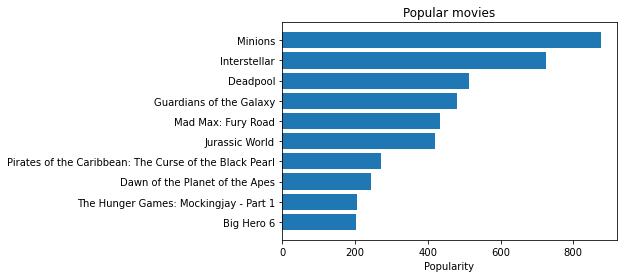

In [88]:
df_pop = dataset.sort_values("popularity",ascending=False)
plt.barh(df_pop["title_x"].head(10),df_pop["popularity"].head(10))
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular movies")
plt.show()

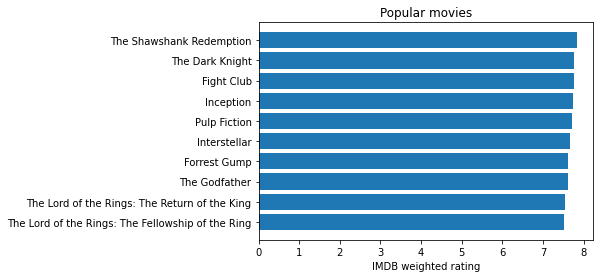

In [90]:
plt.barh(top_10["title_x"].head(10),top_10["weighted_rating"].head(10))
plt.gca().invert_yaxis()
plt.xlabel("IMDB weighted rating")
plt.title("Popular movies")
plt.show()

# Collaborative Filtering

In [101]:
from surprise import reader

ModuleNotFoundError: No module named 'surprise'

In [102]:
pip install scikit-surprise

  Using cached scikit-surprise-1.1.3.tar.gz (771 kB)
  Running setup.py clean for scikit-surprise
Failed to build scikit-surprise
    Running setup.py install for scikit-surprise: started
    Running setup.py install for scikit-surprise: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\mkmah\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\mkmah\\AppData\\Local\\Temp\\pip-install-2uetrdui\\scikit-surprise_31778f003fd142abb263eb84548d4750\\setup.py'"'"'; __file__='"'"'C:\\Users\\mkmah\\AppData\\Local\\Temp\\pip-install-2uetrdui\\scikit-surprise_31778f003fd142abb263eb84548d4750\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\mkmah\AppData\Local\Temp\pip-wheel-td01ude2'
       cwd: C:\Users\mkmah\AppData\Local\Temp\pip-install-2uetrdui\scikit-surprise_31778f003fd142abb263eb84548d4750\
  Complete output (49 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\surprise
  copying surprise\accuracy.py -> build\lib

In [103]:
conda install -c conda-forge/label/cf202003 scikit-surprise

^C

Note: you may need to restart the kernel to use updated packages.
